# Doctor Fees Prediction

In [1]:
# Importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
# Reading the dataset.
df_train = pd.read_excel('Final_Train.xlsx')
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
# First 5 rows of the train dataset.
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
# Columns of the dataset.
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [5]:
# Information of the dataset.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [6]:
# Finding Datatypes.
df_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [7]:
# Describing the values with statistics.
df_train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Observation :
    --> Minimum Fees for Consulting doctor is 5.00INR and Maximum Fees for consulting doctor is 950.00INR.
    
    --> Median for the fees is 300.00 and Mean is 307.944640.

In [8]:
# Finding null values.
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

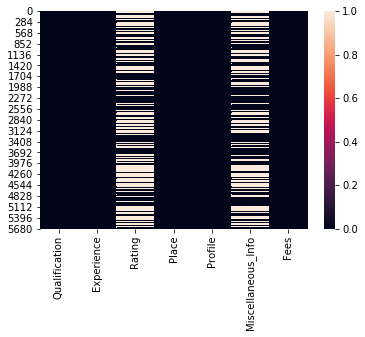

In [9]:
# Visualizing the null values through heatmap.
sns.heatmap(df_train.isnull())

In [10]:
# Filling null values with 0.
for col in ['Rating','Miscellaneous_Info','Place']:
    df_train[col].fillna(df_train[col].mode()[0],inplace=True)

In [11]:
# Checking null values removed or not.
df_train.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

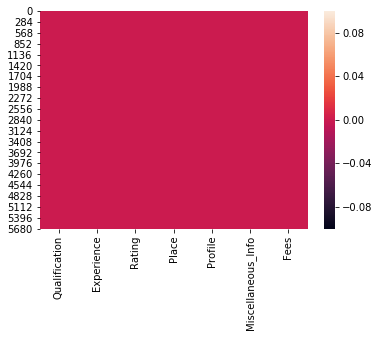

In [12]:
# After removing null values.
sns.heatmap(df_train.isnull())

In [13]:
# Head of the dataset to do preprocessing.
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [14]:
# Removing % from rating column
df_train['Rating']=df_train['Rating'].str.replace('%','').astype(int)

In [15]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [16]:
# Coverting experience into integer for train dataset.
df_train['Experience'] = df_train['Experience'].str.slice(stop=2).astype(int)

In [17]:
# Checking head.
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,100,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12,100,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


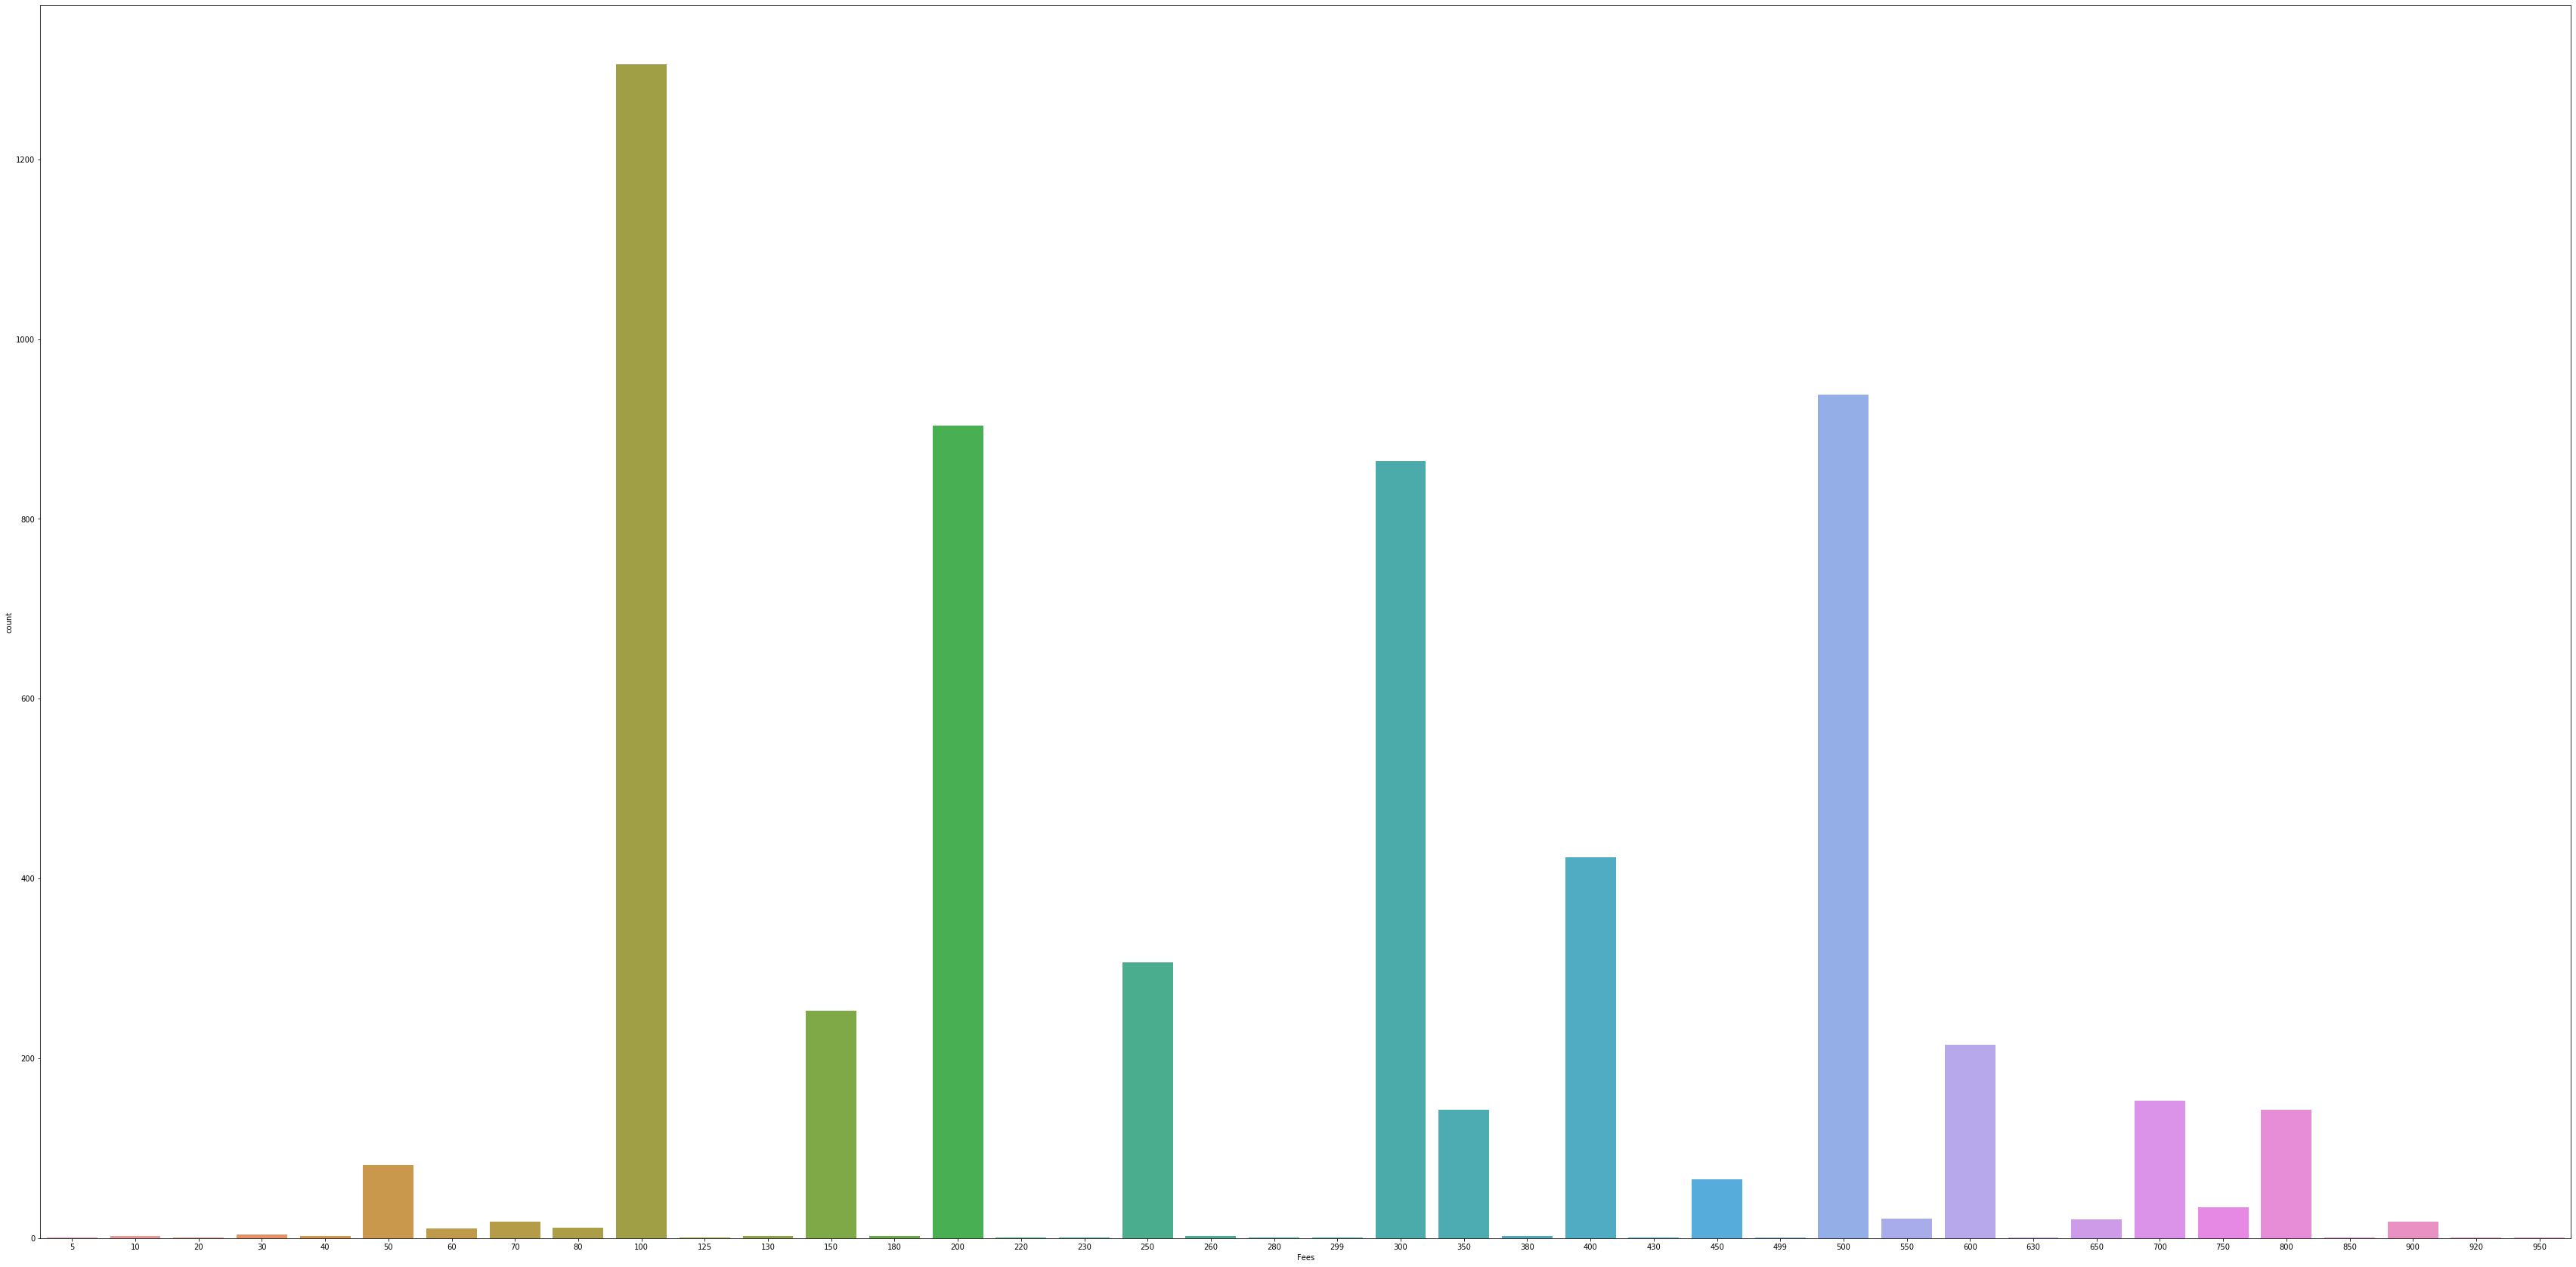

In [18]:
# Visualizing the count plot for 'Fees'.
plt.figure(figsize=(60,30))
sns.countplot(df_train['Fees'])

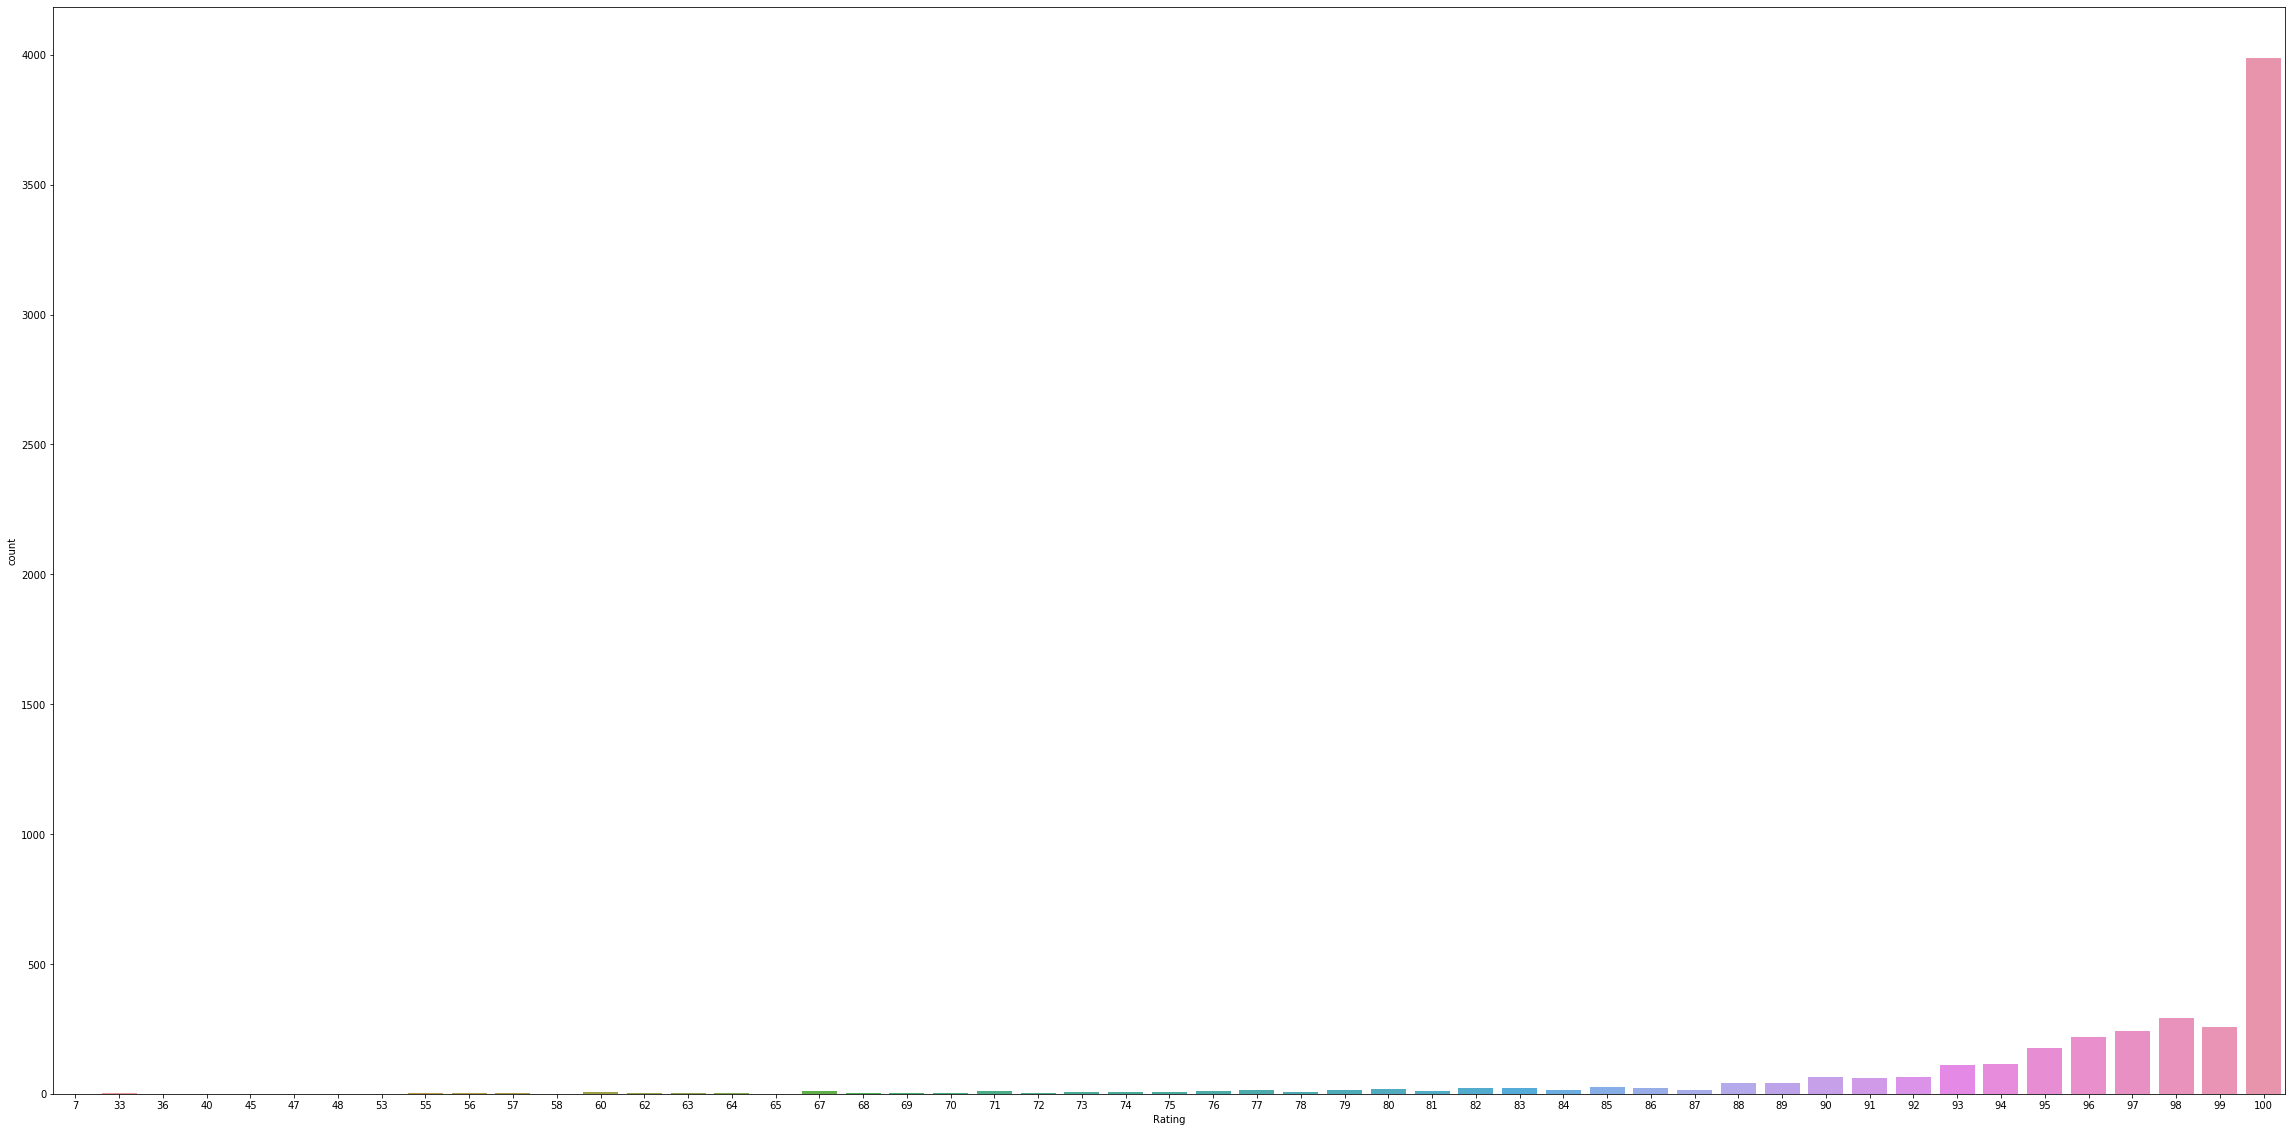

In [19]:
# Visualizing the count plot for 'Rating'.
plt.figure(figsize=(40,20))
sns.countplot(df_train['Rating'])

Text(0, 0.5, 'Count')

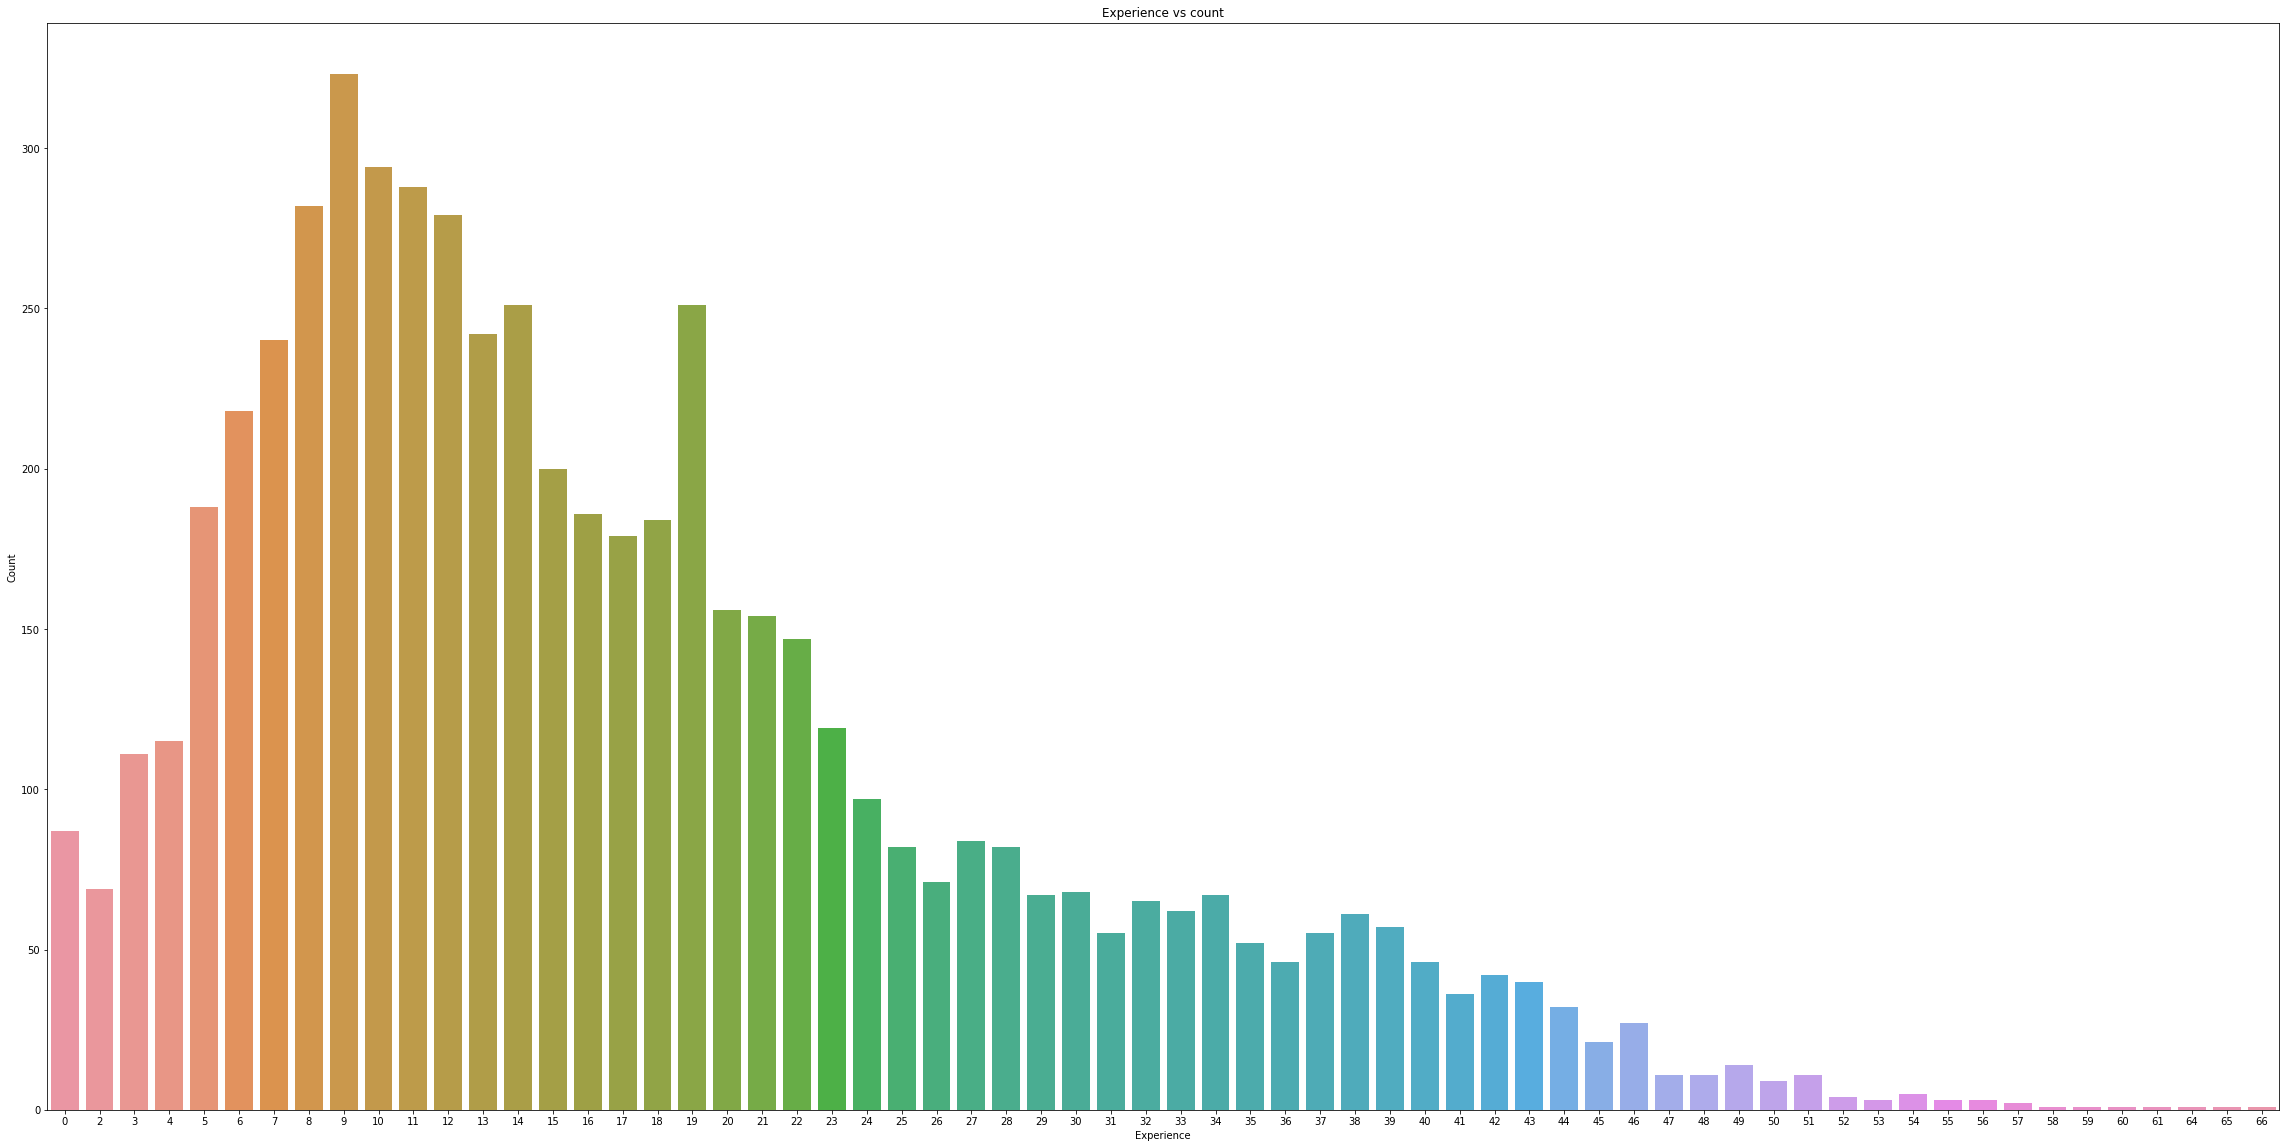

In [52]:
# Visualizing the count plot for 'Experience'.
plt.figure(figsize=(40,20))
sns.countplot(df_train['Experience'])
plt.title('Experience vs count')
plt.xlabel('Experience')
plt.ylabel('Count')

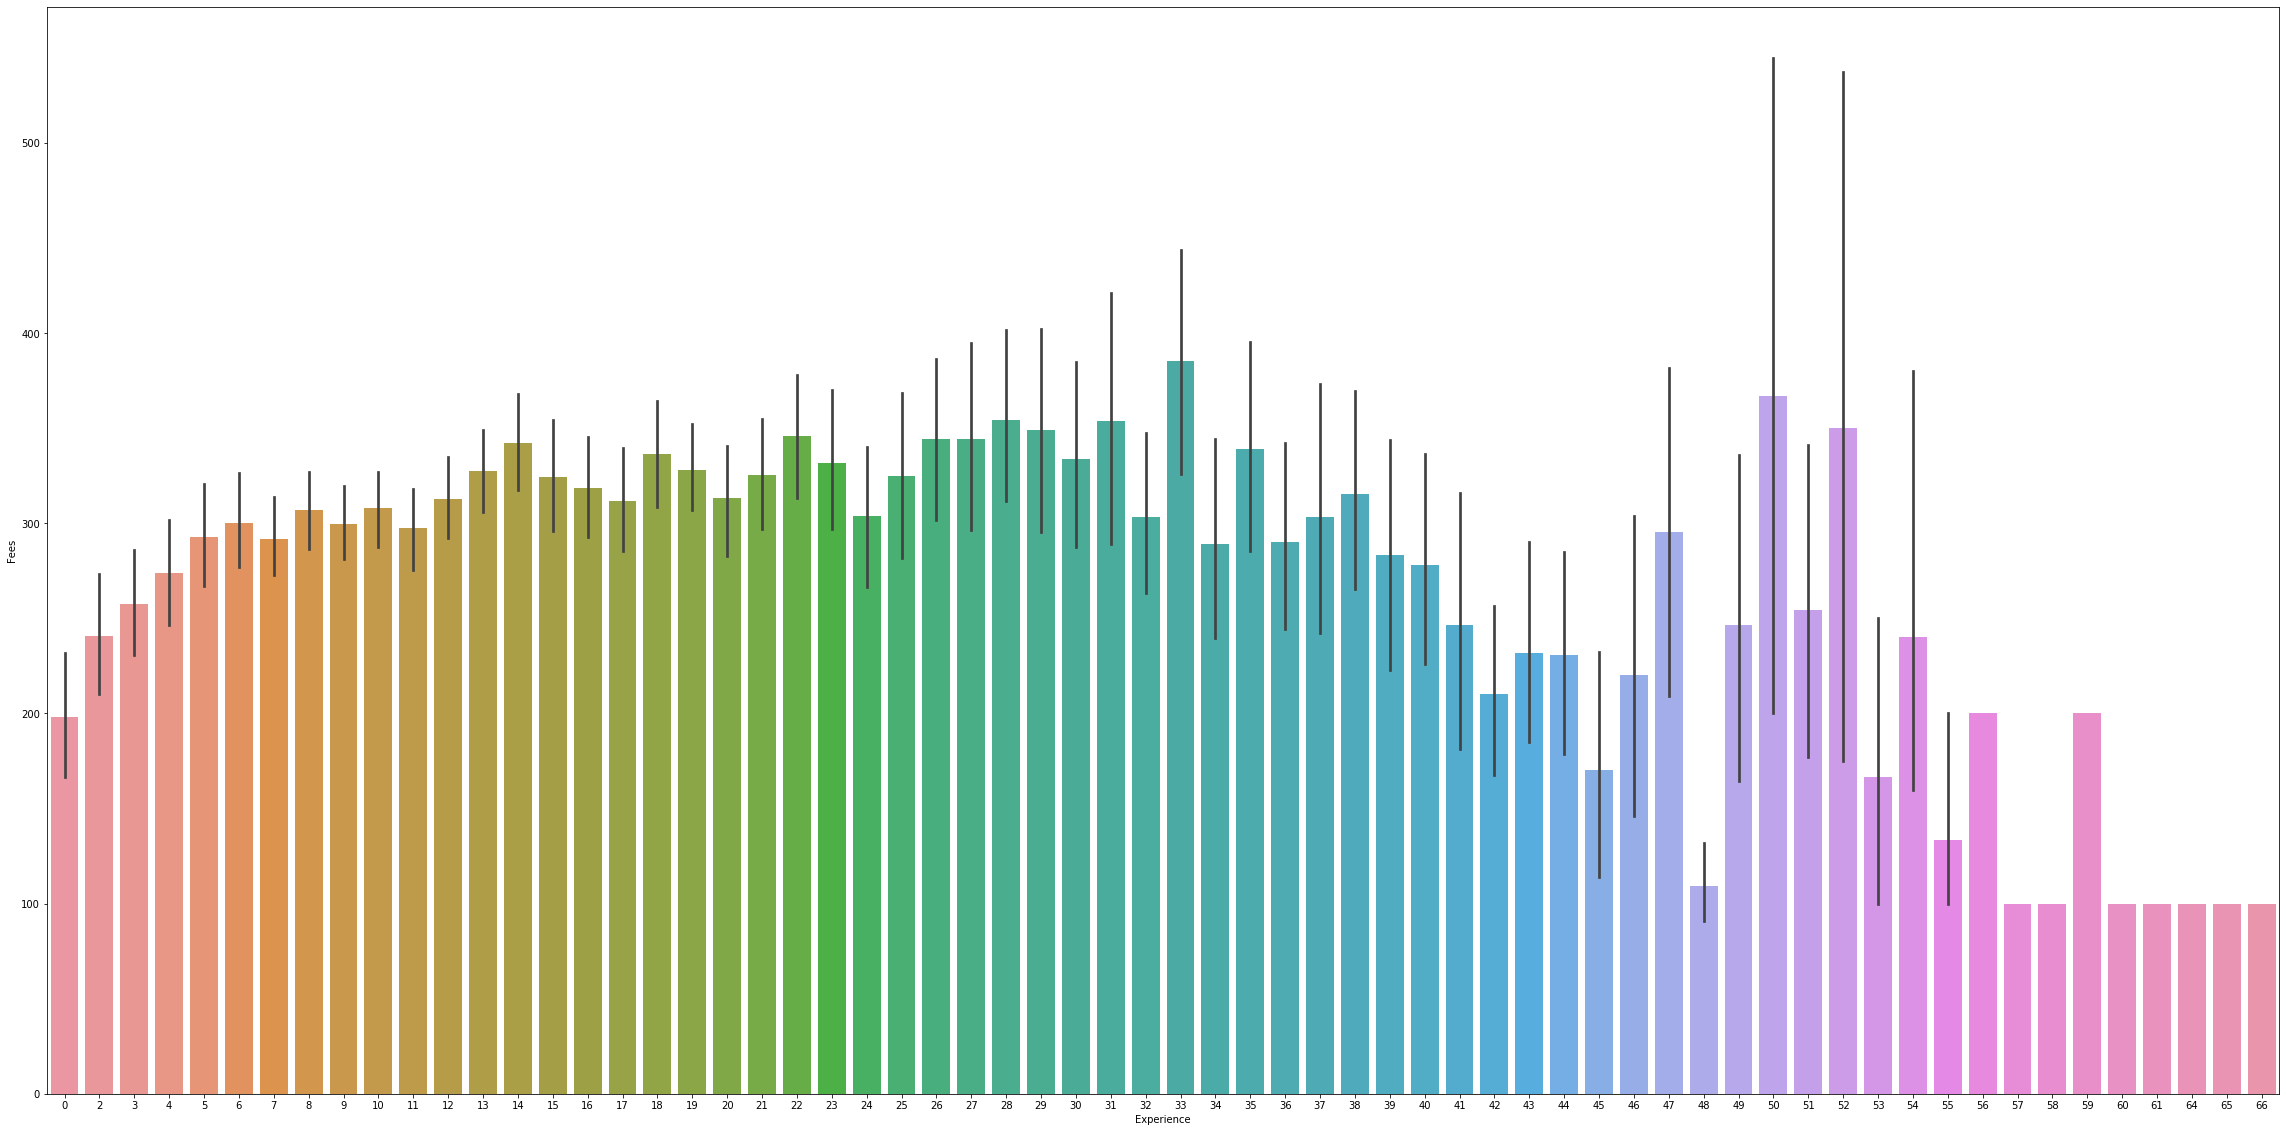

In [21]:
# Visualizing the Bar plot for 'Experience'.
plt.figure(figsize=(40,20))
sns.barplot(x='Experience',y='Fees',data=df_train)

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

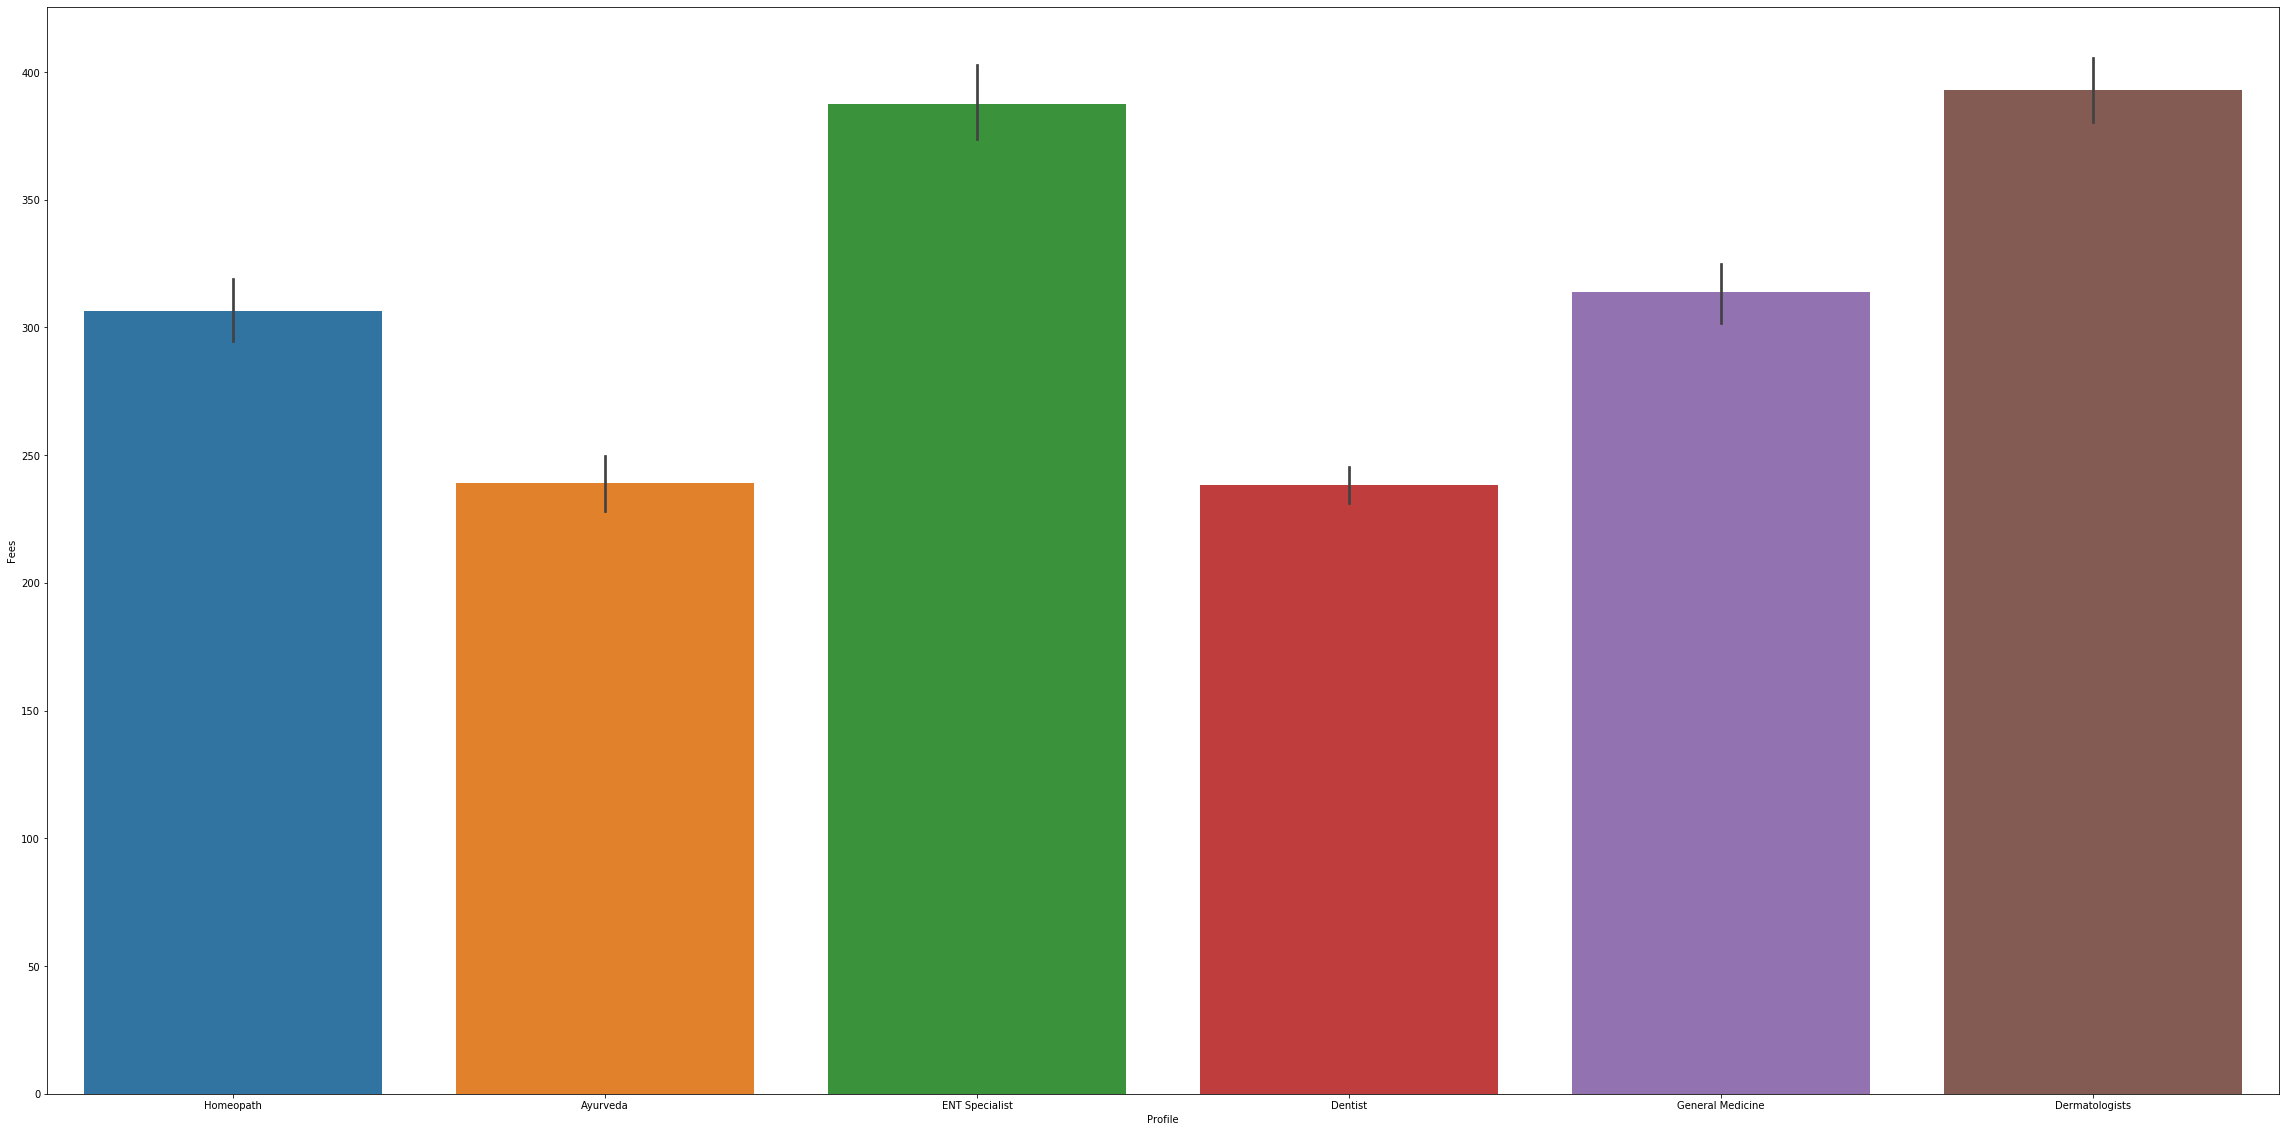

In [22]:
# Visualizing the Bar plot for 'Profile vs Fees'.
plt.figure(figsize=(40,20))
sns.barplot(x='Profile',y='Fees',data=df_train)
df_train['Profile'].value_counts()

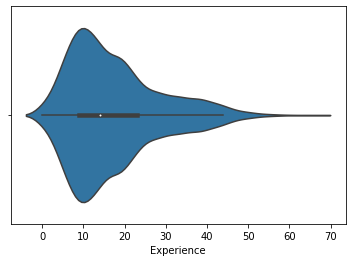

In [23]:
# Visualizing the violin plot for 'Experience'.
sns.violinplot(x='Experience',data=df_train)

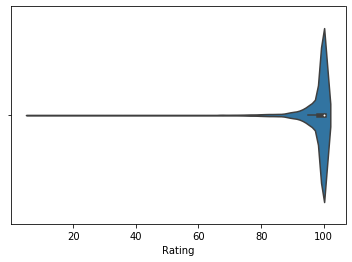

In [24]:
# Visualizing the violin plot for 'Rating'.
sns.violinplot(x='Rating',data=df_train)

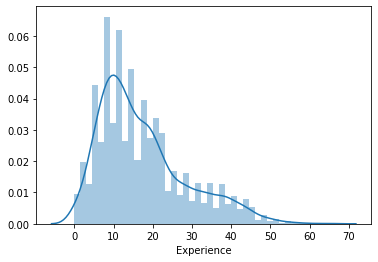

In [25]:
# Visualizing the Distribution plot for 'Experience'.
sns.distplot(df_train['Experience'])

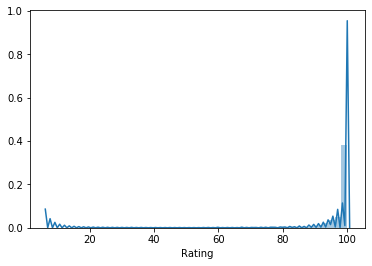

In [26]:
# Visualizing the Distribution plot for 'Rating'.
sns.distplot(df_train['Rating'])

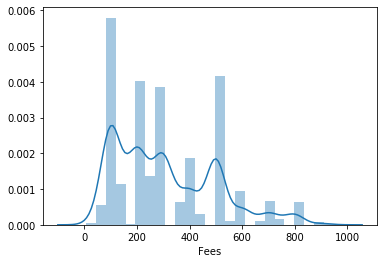

In [27]:
# Visualizing the Distribution plot for 'Fees'.
sns.distplot(df_train['Fees'])

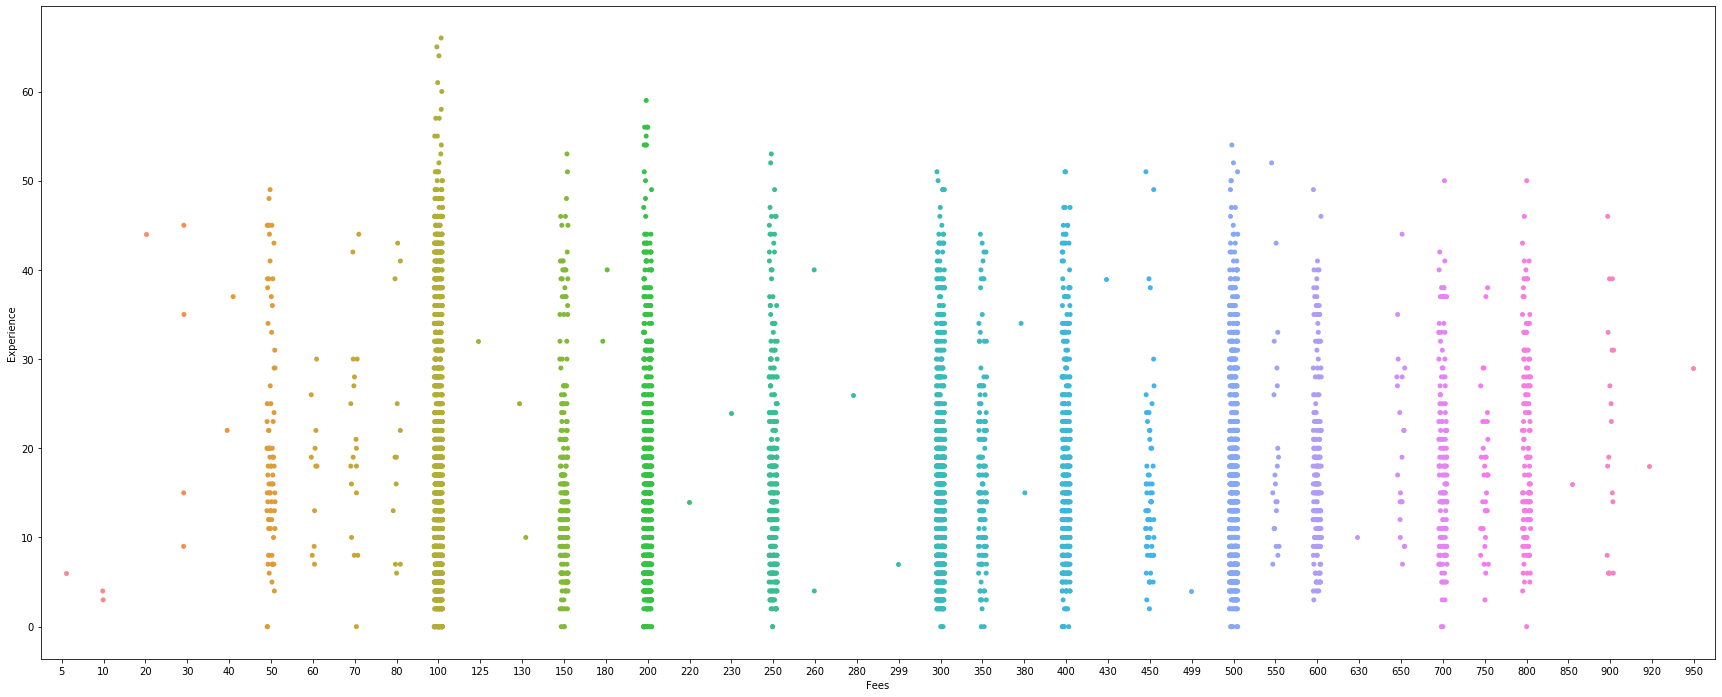

In [28]:
# Visualizing the strip plot for 'Fees vs Experience'.
plt.figure(figsize=(30,12))
sns.stripplot(x='Fees',y='Experience',data=df_train)

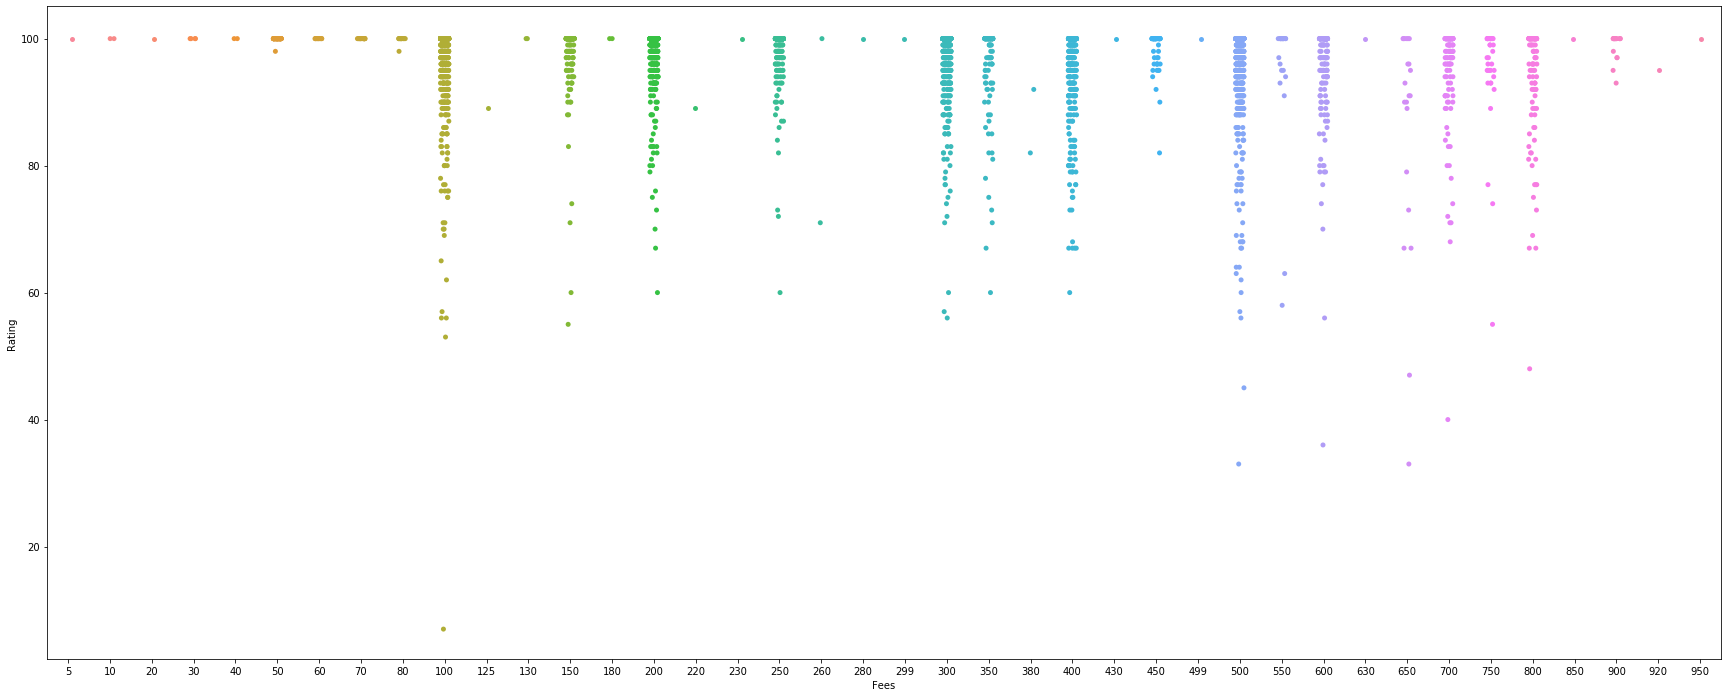

In [29]:
# Visualizing the strip plot for 'Fees vs Rating'.
plt.figure(figsize=(30,12))
sns.stripplot(x='Fees',y='Rating',data=df_train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B59B126C8>,
      dtype=object)

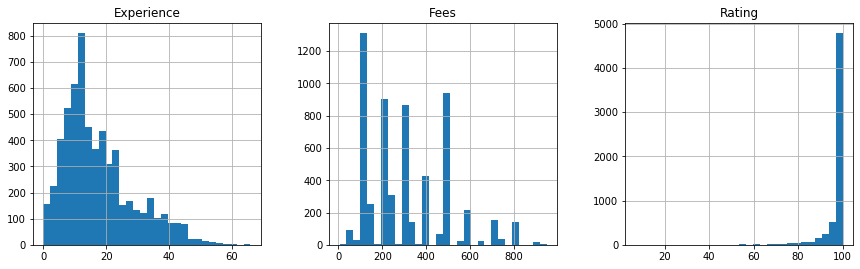

In [30]:
# Visualizing the dataframe through Histogram.
df_train.hist(figsize=(20,20),grid=True,layout = (4,4),bins=30)

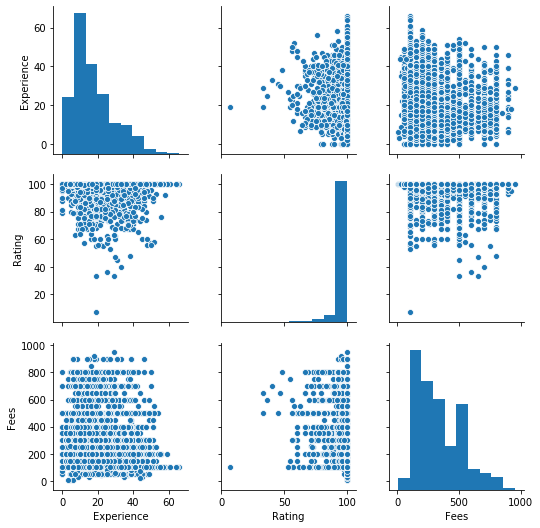

In [31]:
# Visualizing the Pairplot for the dataset.
sns.pairplot(df_train)

Experience       AxesSubplot(0.125,0.71587;0.133621x0.16413)
Rating        AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Fees           AxesSubplot(0.44569,0.71587;0.133621x0.16413)
dtype: object

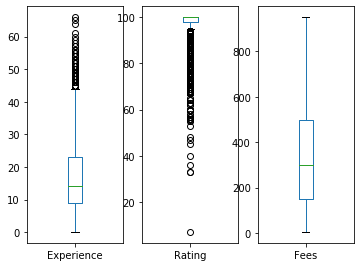

In [32]:
# Finding Outliers through Box plot visualization.
df_train.plot(kind='box',subplots = True, layout=(4,5),figsize = (10,20))

In [33]:
# And,Now Getting dummy values from place and profile
df_train = pd.get_dummies(df_train,columns=['Profile','Place'],prefix=['Profile','Place'])

In [34]:
df_train.head()

,Qualification,Experience,Rating,Miscellaneous_Info,Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,...,"Place_Wilson Garden, Bangalore","Place_Worli, Mumbai","Place_Yakutpura, Hyderabad","Place_Yamuna Vihar, Delhi","Place_Yelahanka New Town, Bangalore","Place_Yelahanka, Bangalore","Place_Yellareddyguda, Hyderabad","Place_Yeshwanthpur, Bangalore","Place_Yousufguda, Hyderabad",Place_e
0,"BHMS, MD - Homeopathy",24,100,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98,"98% 76 Feedback Whitefield, Bangalore",350,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,100,Acrylic Partial Denture Crowns and Bridges Fix...,300,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,100,"Bannerghatta Road, Bangalore ₹250 Available on...",250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,20,100,"100% 4 Feedback Keelkattalai, Chennai",250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Now, we are splitting commas and cleaning the qualification column.
df_train['Qualification']=df_train['Qualification'].str.split(',')
Qualification ={}
for x in df_train['Qualification'].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [36]:
# Sorting the values with lambda function, seperating the values and finally dropping the qualification column.
df_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual =[]
for tup in df_qual:
    final_qual.append(tup[0])
for title in final_qual:
    df_train[title]=0
    
for x,y in zip(df_train["Qualification"].values,np.array([idx for idx in range(len(df_train))])):
    for q in x:
        q = q.strip()
        if q in final_qual:
            df_train[q][y] = 1
df_train.drop("Qualification",axis=1,inplace=True)

In [37]:
# Checking the head of the dataframe. 
df_train.head()

,Experience,Rating,Miscellaneous_Info,Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,12,98,"98% 76 Feedback Whitefield, Bangalore",350,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,9,100,Acrylic Partial Denture Crowns and Bridges Fix...,300,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,12,100,"Bannerghatta Road, Bangalore ₹250 Available on...",250,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,20,100,"100% 4 Feedback Keelkattalai, Chennai",250,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
# We are removing unused columns as miscellaneous_Info.
df_train = df_train.drop('Miscellaneous_Info',axis=1)


In [39]:
# Checking Final head of the dataframe.
df_train.head()

,Experience,Rating,Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,"Place_AECS Layout, Bangalore",...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,100,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,12,98,350,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,9,100,300,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,12,100,250,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,20,100,250,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [40]:
# Defining 'X' and 'y' varaibles.
X = df_train.drop('Fees',axis=1)
y = df_train['Fees']
# Splitting the data into training and testing model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Scaling the values through fit_transform.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [41]:
# By using supportVectorMachine algorithm we are fitting the model.
from sklearn.svm import SVR
m = SVR(gamma="scale")
m.fit(scaler.transform(X_train),y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
# Predicting the model.
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
y_pred = m.predict(scaler.transform(X_test))
score(y_pred,y_test)

0.7494114588434713

In [43]:
# Using GridSearchCV to fit the best model.
from sklearn.model_selection import GridSearchCV
parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg = GridSearchCV(m,param_grid=parameters,n_jobs=-1,cv=5)
reg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
# Predicting through scaler.
y_pred = reg.predict(scaler.transform(X_test))
score(y_pred,y_test)

0.787716577997891

In [47]:
# Finding Accuracy.
Accuracy_Score = score(y_pred,y_test)

In [49]:
# Final Accuracy. 
Accuracy_Score

0.787716577997891

In [50]:
# Saving the model as a pickle in the file
warnings.simplefilter('ignore')
from sklearn.externals import joblib
joblib.dump(SVR,'Doctor_Fees_Prediction.pkl')

['Doctor_Fees_Prediction.pkl']

Thank You...!!